In [87]:
import tensorflow as tf
import tensorflow.keras.preprocessing.image
import PIL
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import Image, display
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive
from google.colab import files



In [34]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [40]:
batch_size = 128
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [44]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [46]:
IMG_SHAPE = (160, 160, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [48]:
for image_batch, label_batch in train_data_gen:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (128, 150, 150, 3)
Label batch shape:  (128,)


In [49]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

In [51]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [52]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [53]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [54]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [57]:
initial_epochs = 10
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 2s 78ms/step - loss: 0.9216 - accuracy: 0.3375


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

In [58]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 80s 137ms/step - loss: 0.2540 - accuracy: 0.8978 - val_loss: 0.0927 - val_accuracy: 0.9751
Epoch 2/10
582/582 [==============================] - 79s 136ms/step - loss: 0.0749 - accuracy: 0.9761 - val_loss: 0.0649 - val_accuracy: 0.9802
Epoch 3/10
582/582 [==============================] - 79s 136ms/step - loss: 0.0594 - accuracy: 0.9801 - val_loss: 0.0563 - val_accuracy: 0.9828
Epoch 4/10
582/582 [==============================] - 79s 136ms/step - loss: 0.0530 - accuracy: 0.9818 - val_loss: 0.0522 - val_accuracy: 0.9837
Epoch 5/10
582/582 [==============================] - 79s 136ms/step - loss: 0.0494 - accuracy: 0.9830 - val_loss: 0.0500 - val_accuracy: 0.9845
Epoch 6/10
582/582 [==============================] - 79s 135ms/step - loss: 0.0471 - accuracy: 0.9835 - val_loss: 0.0482 - val_accuracy: 0.9841
Epoch 7/10
582/582 [==============================] - 75s 128ms/step - loss: 0.0453 - accuracy: 0.9843 - val_loss: 0.0471 - val_ac

In [ ]:
drive.mount('/content/drive')
path = path = F"/content/drive/My Drive/TMLcatsvsdogs" 
model.save(path)

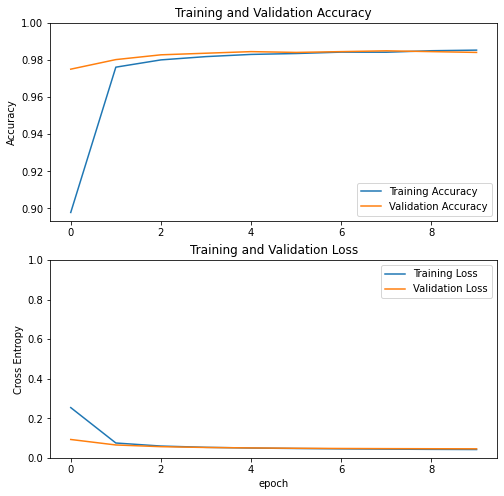

In [63]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Saving 220px-Felis_catus-cat_on_snow.jpg to 220px-Felis_catus-cat_on_snow.jpg


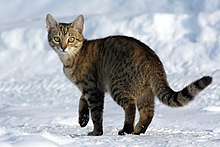

In [94]:
#upload a file to colab to make some predictions with the model
uploaded = files.upload()
for fn in uploaded.keys():
  display(Image(fn))
  

In [95]:
#prediction function
def makepredictions(filename):
  img = load_img(filename)
  img = img.resize((160, 160), resample=PIL.Image.BICUBIC)
  arr = img_to_array(img)
  arr = np.expand_dims(arr, axis=0)
  arr /= 255
  prediction = (model.predict(arr) > 0.5).astype("int32")
  y = prediction[0]
  return (('This is likely a Dog' if y >0 else 'This is likely a Cat')) 

In [96]:
#make the prediction
for fn in uploaded.keys():
  print(makepredictions(fn))

This is likely a Cat
